# Lecture 13 (Neural Networks Continued)

## Autoencoders

Having established the foundational theory behind basic feedforward neural networks, forward and backward propagation, and activation functions, it is natural to extend the discussion toward specialized architectures that exploit the same principles to achieve different objectives beyond simple supervised prediction. One particularly illuminating class of models is the **autoencoder**, which provides a natural introduction to the notions of **latent spaces** and **unsupervised learning**.

Formally, an **autoencoder** is a neural network trained to approximate the identity function on its input space, yet in a nontrivial way: it is explicitly constrained to pass the input through a low-dimensional bottleneck, thereby enforcing a compressed, latent representation of the data. This compression induces a manifold structure on the input space, revealing intrinsic geometrical or statistical features.

Let us denote the input data by a random vector $X$ taking values in $\mathbb{R}^d$, drawn according to some unknown distribution $\mathbb{P}_X$. An autoencoder consists of two primary components: an **encoder** and a **decoder**.

The encoder is a mapping
$$
f: \mathbb{R}^d \to \mathbb{R}^p, \quad p < d,
$$
which maps the input $x \in \mathbb{R}^d$ to a latent vector $z = f(x) \in \mathbb{R}^p$. The space $\mathbb{R}^p$ is often referred to as the **latent space** or **representation space**.

The decoder is a mapping
$$
g: \mathbb{R}^p \to \mathbb{R}^d,
$$
which attempts to reconstruct the original input from its latent code, producing $\hat{x} = g(z) = g(f(x))$.

The composite mapping $g \circ f : \mathbb{R}^d \to \mathbb{R}^d$ is thus the function that the autoencoder actually learns, with the goal that
$$
g(f(x)) \approx x
$$
for inputs $x$ sampled from $\mathbb{P}_X$.

Training the autoencoder amounts to minimizing a reconstruction loss, typically the empirical risk associated with the $L^2$ loss function:
$$
\mathcal{L}(f, g) = \mathbb{E}_{X \sim \mathbb{P}_X} \left[ \| X - g(f(X)) \|^2 \right],
$$
where $\| \cdot \|$ denotes the standard Euclidean norm on $\mathbb{R}^d$.

In practice, given a finite training set $\{x^{(i)}\}_{i=1}^n \subset \mathbb{R}^d$, the empirical loss is minimized:
$$
\mathcal{L}_{\text{emp}}(f, g) = \frac{1}{n} \sum_{i=1}^n \| x^{(i)} - g(f(x^{(i)})) \|^2.
$$

The key insight is that the bottleneck dimension $p$ being smaller than $d$ forces the network to discover meaningful compressed representations: information that is not essential for reconstructing $x$ must necessarily be discarded. Therefore, under suitable conditions (such as sufficient network capacity and appropriate optimization), the map $f$ learns to project the data onto a lower-dimensional manifold $\mathcal{M} \subseteq \mathbb{R}^p$ capturing the essential degrees of freedom in the input distribution.

It is important to note that this perspective relies heavily on the manifold hypothesis, an assumption prevalent in modern machine learning theory, which posits that high-dimensional data distributions encountered in practice are concentrated near low-dimensional submanifolds of the ambient space.

In an idealized limiting case where $n \to \infty$ and the model class is sufficiently expressive, one would hope that $f$ becomes approximately an injective immersion of the underlying data manifold into $\mathbb{R}^p$, and that $g$ becomes approximately an inverse immersion (locally).

More formally, if we denote the data manifold by $\mathcal{M} \subset \mathbb{R}^d$ with $\dim(\mathcal{M}) = p$, and if $X$ is supported near $\mathcal{M}$, then the encoder $f$ should behave approximately like a chart:
$$
f: \mathcal{M} \to \mathbb{R}^p,
$$
with $f$ a diffeomorphism onto its image, and the decoder $g$ serving as a smooth approximation of the inverse map.

One can interpret $f(x)$ as a **coordinate system** on the manifold $\mathcal{M}$, and $g(z)$ as reconstructing a point on the manifold from its coordinates.

In this light, the latent space $\mathbb{R}^p$ acquires a rich geometrical meaning: it is not merely a lower-dimensional space but a parametrization of the essential variations in the data. However, in practice, the learned latent variables $z = f(x)$ often fail to exhibit globally meaningful geometric structures unless further regularization or architectural constraints are imposed.

## Different types of autoencoders

We have already seen the **standard autoencoder**, wherein the network seeks to minimize the reconstruction loss
$$
\mathcal{L}(f, g) = \mathbb{E}_{X} \left[\|X - g(f(X))\|^2\right].
$$

### Denoising autoencoders

The first important extension is the **denoising autoencoder**. Here, rather than attempting to reconstruct $X$ from itself, the autoencoder is trained to reconstruct $X$ from a corrupted version $\tilde{X}$. Formally, let $\tilde{X}$ be a random variable obtained by applying some corruption process (such as additive noise or masking) to $X$. The encoder-decoder pair $(f, g)$ is trained to minimize
$$
\mathcal{L}_{\text{denoise}}(f, g) = \mathbb{E}_X \, \mathbb{E}_{\tilde{X} \sim q(\tilde{X} \mid X)} \left[ \| X - g(f(\tilde{X})) \|^2 \right],
$$
where $q(\tilde{X} \mid X)$ denotes the corruption distribution. The mathematical rationale is that the model learns to capture stable features of the data that are invariant under small perturbations, thereby improving generalization and robustness.

---

### Sparse autoencoders

A second important variant is the **sparse autoencoder**. In this formulation, the latent representation $z = f(x)$ is encouraged to be sparse, meaning that most of its components are near zero for any given input $x$. This is not enforced by reducing the latent space dimension $p$, but rather by adding an explicit regularization penalty to the loss function. A typical form of the regularized loss is
$$
\mathcal{L}_{\text{sparse}}(f, g) = \mathbb{E}_X \left[ \| X - g(f(X)) \|^2 \right] + \lambda \sum_{j=1}^p \phi\left(\mathbb{E}_X [|z_j|]\right),
$$
where $\phi$ is a convex penalty function, such as the Kullback-Leibler divergence between the expected activations and a small target sparsity level $\rho \ll 1$, and $\lambda > 0$ is a hyperparameter controlling the strength of the sparsity penalty. Sparse encodings are theoretically motivated by connections to overcomplete basis learning and can reveal interpretable structure in the data.

---

### Contractive autoencoders

Another important construction is the **contractive autoencoder**. Here, the goal is to ensure that the encoder map $f$ is locally insensitive to small variations of the input. This is achieved by penalizing the Frobenius norm of the Jacobian matrix $J_f(x)$ of the encoder:
$$
J_f(x) = \left( \frac{\partial f_j(x)}{\partial x_i} \right)_{i,j}.
$$
The loss function becomes
$$
\mathcal{L}_{\text{contractive}}(f, g) = \mathbb{E}_X \left[ \| X - g(f(X)) \|^2 + \lambda \| J_f(X) \|_F^2 \right],
$$
where $\|\cdot\|_F$ denotes the Frobenius norm. Intuitively, minimizing $\|J_f(x)\|_F^2$ encourages $f$ to be locally constant, thereby learning a representation that captures essential directions of variation while being invariant to small perturbations orthogonal to the data manifold.

---

### Variational autoencoders

Moving to a more fundamentally different paradigm, we encounter the **variational autoencoder (VAE)**. A VAE replaces deterministic mappings $f$ and $g$ by stochastic mappings governed by latent variables. Instead of mapping $x$ deterministically to $z$, the encoder defines a distribution $q_\phi(z \mid x)$ (typically Gaussian), and the decoder defines a likelihood $p_\theta(x \mid z)$. The training objective is no longer the direct reconstruction error, but rather the maximization of a variational lower bound on the marginal log-likelihood of the data:
$$
\log p_\theta(x) \geq \mathbb{E}_{z \sim q_\phi(z \mid x)}[\log p_\theta(x \mid z)] - D_{\mathrm{KL}}(q_\phi(z \mid x) \,\|\, p(z)),
$$
where $p(z)$ is a prior on the latent space (often standard normal), and $D_{\mathrm{KL}}$ denotes the Kullback-Leibler divergence. The first term encourages good reconstruction, while the second term regularizes the approximate posterior $q_\phi(z \mid x)$ to be close to $p(z)$. VAEs thereby endow the latent space with a well-defined probabilistic structure, facilitating sampling and interpolation.



# An explicit example in PyTorch

## A standard autoencoder

We will construct a **standard autoencoder** applied to the **Olivetti Faces dataset** using **PyTorch**.  The goal is to observe how an undercomplete autoencoder compresses and reconstructs real-world image data. Before writing the code, let us recall the formal setup:

Given $x \in \mathbb{R}^{4096}$ (since each Olivetti face is a $64 \times 64$ grayscale image),  
we seek to learn maps
$$
f: \mathbb{R}^{4096} \to \mathbb{R}^p \quad \text{(encoder)},
$$
$$
g: \mathbb{R}^p \to \mathbb{R}^{4096} \quad \text{(decoder)},
$$
for some latent dimension $p \ll 4096$, minimizing the empirical reconstruction loss
$$
\mathcal{L}_{\text{emp}}(f, g) = \frac{1}{n} \sum_{i=1}^n \| x^{(i)} - g(f(x^{(i)})) \|^2.
$$

We will implement this explicitly.

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

Let us start by loading up the data:

In [5]:
faces = fetch_olivetti_faces()
X = faces.images  # Shape (400, 64, 64)
X = X.reshape((-1, 64*64))  # Flatten to (400, 4096)
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)

train_dataset = torch.utils.data.TensorDataset(X_train)

Let us define our autoencoder:

In [27]:
class Autoencoder(nn.Module):
    def __init__(self, latent_dim=128):
        super(Autoencoder, self).__init__()
        
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(64*64, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, latent_dim)
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 64*64),
            nn.Sigmoid()  # Values in [0,1] since faces are normalized
        )
    
    def forward(self, x):
        z = self.encoder(x)
        x_hat = self.decoder(z)
        return x_hat

latent_dim = 64
model = Autoencoder(latent_dim=latent_dim)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.MSELoss()

Here is the training as a function. We are going to use the same function for other types of autoencoders.

In [31]:
def add_noise(inputs, noise_factor=0.3):
    noisy = inputs + noise_factor * torch.randn_like(inputs)
    noisy = torch.clip(noisy, 0., 1.)
    return noisy

def train_and_test(model, optimizer, criterion, noise=False, num_epochs=100, batch_size=32):
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    loss_history = []
    for epoch in range(num_epochs):
        model.train()
        epoch_loss = 0
        for batch in train_loader:
            inputs = batch[0]
            optimizer.zero_grad()
            if noise:
                noisy_inputs = add_noise(inputs, noise_factor)
                outputs = model(inputs)
            else:
                outputs = model(inputs)
            loss = criterion(outputs, inputs)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()
            loss_history.append(epoch_loss)
        if (epoch+1) % 10 == 0:
            print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss / len(train_loader):.6f}")
    plt.figure(figsize=(8,4))
    plt.plot(loss_history)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training Loss over Epochs (PyTorch)")
    plt.grid(True)
    plt.show()

Epoch 10/100, Loss: 0.003409
Epoch 20/100, Loss: 0.002569
Epoch 30/100, Loss: 0.002213
Epoch 40/100, Loss: 0.001941
Epoch 50/100, Loss: 0.001715
Epoch 60/100, Loss: 0.001704
Epoch 70/100, Loss: 0.001240
Epoch 80/100, Loss: 0.001019
Epoch 90/100, Loss: 0.001040
Epoch 100/100, Loss: 0.000941


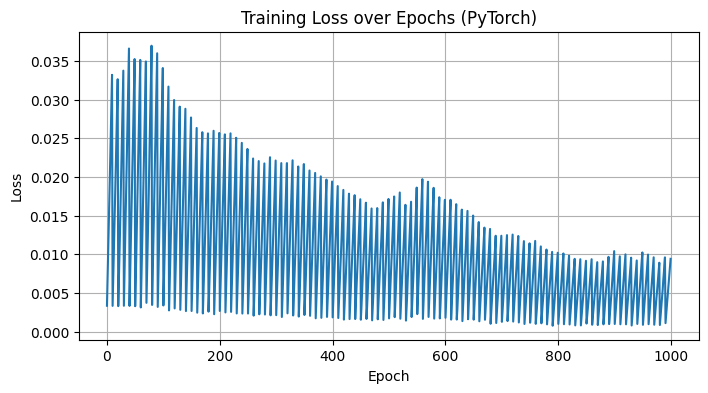

In [32]:
train_and_test(model, optimizer, criterion)

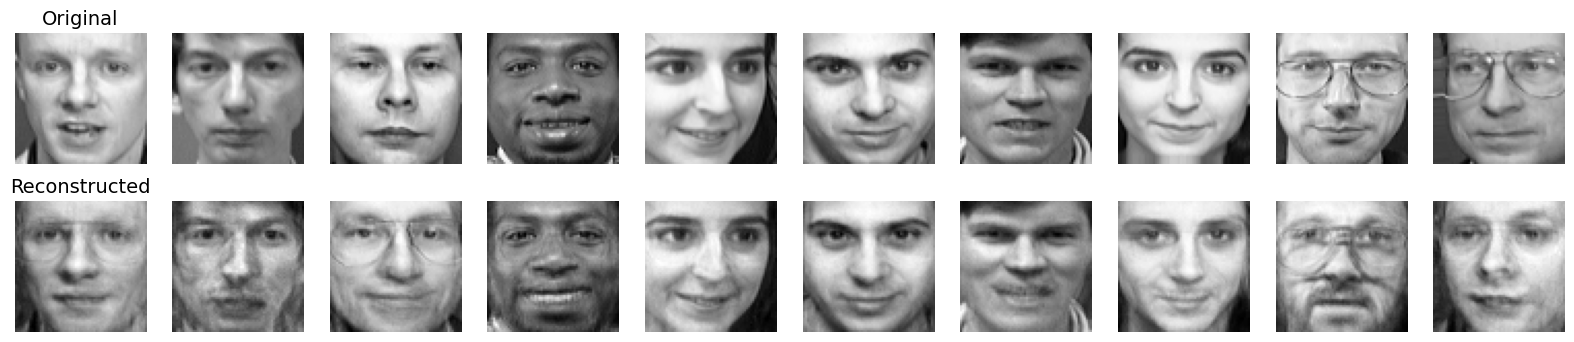

In [33]:
model.eval()
with torch.no_grad():
    reconstructed = model(X_test)

def plot_faces(original, reconstructed, num_images=10):
    fig, axes = plt.subplots(2, num_images, figsize=(20, 4))
    for i in range(num_images):
        axes[0, i].imshow(original[i].reshape(64, 64), cmap='gray')
        axes[0, i].axis('off')
        axes[1, i].imshow(reconstructed[i].reshape(64, 64), cmap='gray')
        axes[1, i].axis('off')
    axes[0, 0].set_title('Original', fontsize=14)
    axes[1, 0].set_title('Reconstructed', fontsize=14)
    plt.show()

plot_faces(X_test.numpy(), reconstructed.numpy(), num_images=10)

**Mathematical Remarks:**

- We chose the latent dimension $p=64$ heuristically. It is significantly smaller than $d=4096$, thereby enforcing a substantial compression.
- Activation functions are **ReLU** for the hidden layers, which is standard practice, while the output layer uses **Sigmoid** because the Olivetti faces are normalized to the $[0,1]$ range.
- The loss function is the **Mean Squared Error (MSE)**, corresponding to the $L^2$ loss $\|x - \hat{x}\|^2$ assumed in the theoretical formulation.
- Optimization is performed via **Adam**, an adaptive stochastic gradient descent method particularly suited for deep architectures.

The decoder attempts to reconstruct each face from its corresponding low-dimensional latent encoding. If training succeeds, this demonstrates that the network has learned to capture the essential degrees of freedom of facial structure.

## Denoising autoencoder


Epoch 10/100, Loss: 0.015700
Epoch 20/100, Loss: 0.011123
Epoch 30/100, Loss: 0.009411
Epoch 40/100, Loss: 0.009027
Epoch 50/100, Loss: 0.007661
Epoch 60/100, Loss: 0.006467
Epoch 70/100, Loss: 0.005745
Epoch 80/100, Loss: 0.004917
Epoch 90/100, Loss: 0.004197
Epoch 100/100, Loss: 0.003547


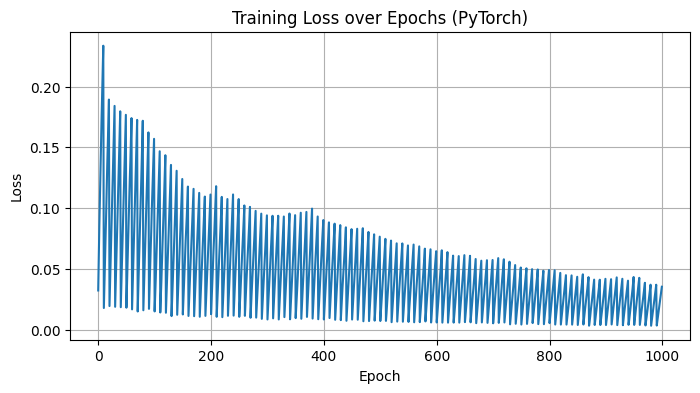

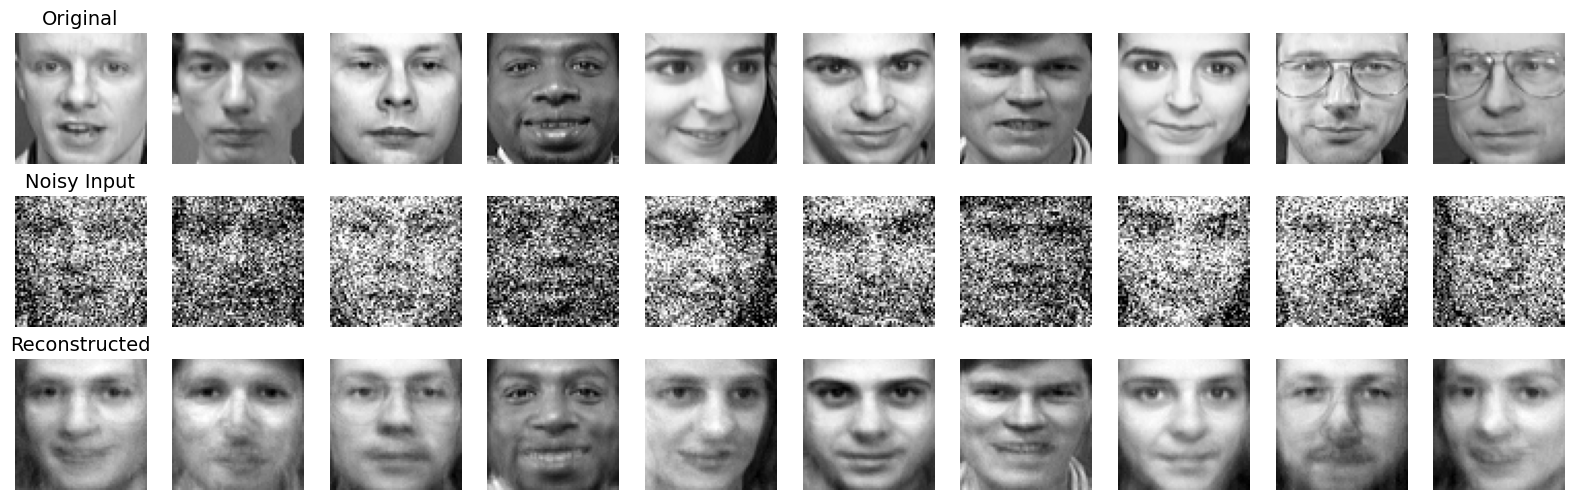

In [35]:
latent_dim = 64
noise_factor = 0.3
model = Autoencoder(latent_dim=latent_dim)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
criterion = nn.MSELoss()

train_and_test(model,optimizer,criterion,noise=True)

model.eval()
with torch.no_grad():
    noisy_test = add_noise(X_test, noise_factor)
    reconstructed = model(noisy_test)

def plot_denoising(original, noisy, reconstructed, num_images=10):
    fig, axes = plt.subplots(3, num_images, figsize=(20, 6))
    for i in range(num_images):
        axes[0, i].imshow(original[i].reshape(64, 64), cmap='gray')
        axes[0, i].axis('off')
        axes[1, i].imshow(noisy[i].reshape(64, 64), cmap='gray')
        axes[1, i].axis('off')
        axes[2, i].imshow(reconstructed[i].reshape(64, 64), cmap='gray')
        axes[2, i].axis('off')
    axes[0, 0].set_title('Original', fontsize=14)
    axes[1, 0].set_title('Noisy Input', fontsize=14)
    axes[2, 0].set_title('Reconstructed', fontsize=14)
    plt.show()

plot_denoising(X_test.numpy(), noisy_test.numpy(), reconstructed.numpy(), num_images=10)


**Mathematical Remarks:**

- The noise model $q(\tilde{X} \mid X)$ is Gaussian: $\tilde{X} = X + \varepsilon$ with $\varepsilon \sim \mathcal{N}(0, \sigma^2 I_d)$.
- The reconstruction loss is computed with respect to the *clean* $X$, not the noisy input $\tilde{X}$. Thus the model is explicitly trained to remove noise.
- The constraint $\tilde{X} \in [0,1]^d$ is enforced after adding noise, by clipping.
- Architecturally, the denoising autoencoder is identical to the standard autoencoder; the only difference lies in the input preprocessing during training.

By learning to map corrupted faces back to clean faces, the autoencoder must discover and internalize robust structural regularities of facial features.  
This moves the learning objective away from mere memorization and toward **structural feature extraction**.


## Variational autoencoders



In [53]:
class VAE(nn.Module):
    def __init__(self, latent_dim=20):
        super(VAE, self).__init__()
        
        # Encoder
        self.encoder_fc1 = nn.Linear(64*64, 1024)
        self.encoder_fc2 = nn.Linear(1024, 512)
        self.fc_mu = nn.Linear(512, latent_dim)
        self.fc_logvar = nn.Linear(512, latent_dim)
        
        # Decoder
        self.decoder_fc1 = nn.Linear(latent_dim, 512)
        self.decoder_fc2 = nn.Linear(512, 1024)
        self.decoder_out = nn.Linear(1024, 64*64)
        
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def encode(self, x):
        h = self.relu(self.encoder_fc1(x))
        h = self.relu(self.encoder_fc2(h))
        mu = self.fc_mu(h)
        logvar = self.fc_logvar(h)
        return mu, logvar
    
    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std
    
    def decode(self, z):
        h = self.relu(self.decoder_fc1(z))
        h = self.relu(self.decoder_fc2(h))
        out = self.sigmoid(self.decoder_out(h))
        return out
    
    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        x_hat = self.decode(z)
        return x_hat, mu, logvar

def loss_function(x_hat, x, mu, logvar):
    # Reconstruction loss (binary cross-entropy)
    recon_loss = nn.functional.binary_cross_entropy(x_hat, x, reduction='sum')
    # KL divergence
    kl_div = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return recon_loss + kl_div

Epoch 10/100, Loss: 87352.410156
Epoch 20/100, Loss: 86413.686719
Epoch 30/100, Loss: 86135.083594
Epoch 40/100, Loss: 85897.915625
Epoch 50/100, Loss: 85450.793750
Epoch 60/100, Loss: 85289.266406
Epoch 70/100, Loss: 85131.198438
Epoch 80/100, Loss: 85162.655469
Epoch 90/100, Loss: 84931.089063
Epoch 100/100, Loss: 84898.379687


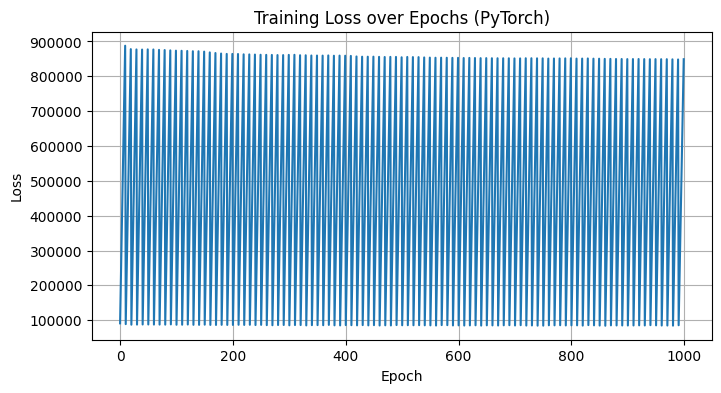

In [65]:
latent_dim = 20
model = VAE(latent_dim=latent_dim)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

num_epochs = 100
batch_size = 32
loss_history = []
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    for batch in train_loader:
        inputs = batch[0] 
        optimizer.zero_grad()
        outputs, mu, logvar = model(inputs)
        loss = loss_function(outputs, inputs, mu, logvar)
        loss.backward()
        optimizer.step() 
        epoch_loss += loss.item()
        loss_history.append(epoch_loss)
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss / len(train_loader):.6f}")

plt.figure(figsize=(8,4))
plt.plot(loss_history)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss over Epochs (PyTorch)")
plt.grid(True)
plt.show()

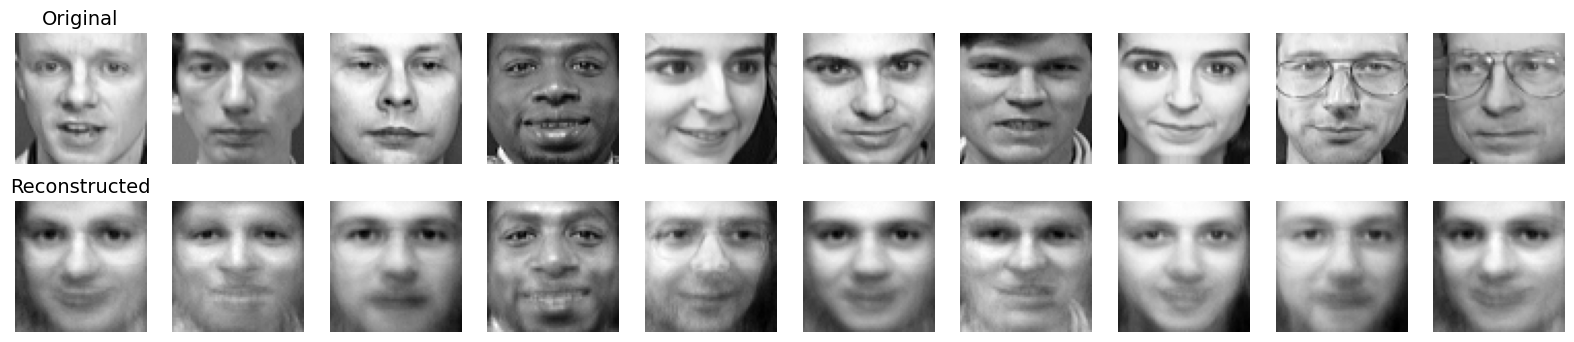

In [66]:
model.eval()
with torch.no_grad():
    reconstructed, _, _ = model(X_test)

def plot_vae_reconstruction(original, reconstructed, num_images=10):
    fig, axes = plt.subplots(2, num_images, figsize=(20, 4))
    for i in range(num_images):
        axes[0, i].imshow(original[i].reshape(64, 64), cmap='gray')
        axes[0, i].axis('off')
        axes[1, i].imshow(reconstructed[i].reshape(64, 64), cmap='gray')
        axes[1, i].axis('off')
    axes[0, 0].set_title('Original', fontsize=14)
    axes[1, 0].set_title('Reconstructed', fontsize=14)
    plt.show()

plot_vae_reconstruction(X_test.numpy(), reconstructed.numpy(), num_images=10)


### Formal Summary of Mathematical Mechanisms:

- The encoder outputs parameters $(\mu, \log \sigma^2)$ of an approximate posterior $q_\phi(z \mid x) \sim \mathcal{N}(\mu(x), \sigma^2(x))$.
- The decoder defines $p_\theta(x \mid z)$, which we model here via a Bernoulli likelihood (hence binary cross-entropy loss), because pixel values are normalized to $[0,1]$.
- The overall loss combines the expected negative log-likelihood with a regularization via KL divergence enforcing proximity to the prior $p(z)$.
- The **reparameterization trick** ensures that stochastic sampling is differentiable with respect to encoder parameters.

Thus, the VAE simultaneously:
- learns a **probabilistic latent space** structured around the prior,
- reconstructs the input data approximately,
- enables meaningful **sampling** from the latent space to generate new images.



## Using variational autoencoders to generate new outputs

### Mathematical Foundation

Recall that the encoder $q_\phi(z \mid x)$ has been trained to approximate samples from the standard normal prior
$$
p(z) = \mathcal{N}(0, I_p),
$$
where $p$ is the dimension of the latent space (in our case $p=20$). Thus, after training, we can **sample latent vectors** directly from the prior $p(z)$, namely by generating
$$
z \sim \mathcal{N}(0, I_p),
$$
and then **decode** these latent samples via the decoder network $g_\theta$ to produce new synthetic images
$$
\hat{x} = g_\theta(z).
$$

This procedure provides a method of **generative sampling**, exploiting the VAE’s probabilistic structure.  Let us implement this explicitly.

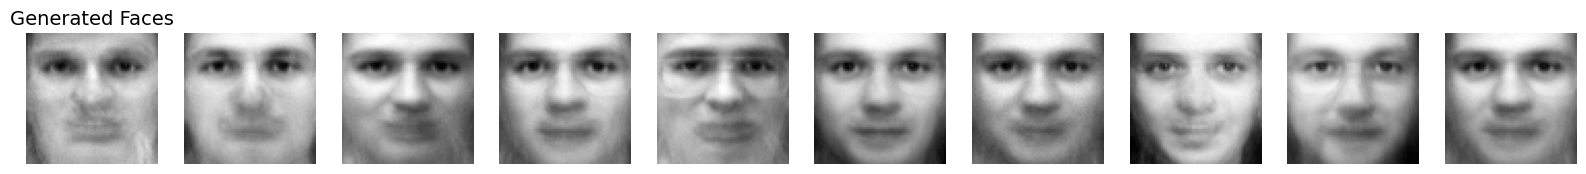

In [69]:
def sample_and_generate(model, num_samples=10):
    model.eval()
    with torch.no_grad():
        z = torch.randn(num_samples, model.fc_mu.out_features)  # Sample from N(0,I)
        generated = model.decode(z)
    return generated

num_samples = 10
generated_faces = sample_and_generate(model, num_samples=num_samples)

def plot_generated_faces(generated_faces, num_images=10):
    fig, axes = plt.subplots(1, num_images, figsize=(20, 2))
    for i in range(num_images):
        axes[i].imshow(generated_faces[i].reshape(64, 64), cmap='gray')
        axes[i].axis('off')
    axes[0].set_title('Generated Faces', fontsize=14)
    plt.show()

plot_generated_faces(generated_faces, num_images=num_samples)

### Formal Observations:

- The sampling process does **not** require any actual training data. It proceeds entirely by exploiting the learned decoder $g_\theta$ and the assumed prior distribution on latent variables.
- The quality of the generated samples depends critically on how well $q_\phi(z \mid x)$ has been regularized toward $p(z)$.  
If the KL divergence term during training was effective, samples $z \sim \mathcal{N}(0,I_p)$ will map to plausible faces.
- In cases where the VAE is undertrained, or the prior is not well matched to the empirical posterior, generated faces may appear blurry, noisy, or unnatural. This reflects the inherent difficulty of capturing complex high-dimensional data distributions with simple isotropic Gaussian priors.

